# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches

In [179]:
can_data = np.array([101.8, 101.5, 102.6, 101, 101.8, 96.8, 102.4, 100, 98.8, 98.1, 98.8, 98, 99.4, 95.5, 100.1, 100.5, 97.4, 100.2, 101.4, 98.7, 101.4, 99.4, 101.7, 99, 99.7, 98.8, 99.5, 100, 99.7, 100.9, 99.7, 99, 98.8, 99.7, 100.9, 99.9, 97.5, 101.5, 98.2, 99.2, 98.6, 101.4, 102.1, 102.9, 100.8, 99.4, 103.7, 100.3, 100.2, 101.1, 101.8, 100, 101.2, 100.5, 101.2, 101.6, 99.9, 100.5, 100.4, 98.1, 100.1, 101.6, 99.3, 96.1, 100, 99.7, 99.7, 99.4, 101.5, 100.9, 101.2, 99.9, 99.1, 100.7, 100.8,100.8, 101.4, 100.3, 98.4, 97.2])

## 도수분포표 생성하기

In [180]:
bins = 5
can_data_binned = pd.cut(can_data, bins=bins)
    
freq_table = pd.crosstab(index=can_data_binned, columns="frequency")

freq_table['relative_frequency'] = freq_table['frequency'] / freq_table['frequency'].sum()
freq_table['cum_relative_frequency'] = freq_table['relative_frequency'].cumsum()

freq_table.index.name = 'can_data'
freq_table.columns.name = None

print(freq_table)

                  frequency  relative_frequency  cum_relative_frequency
can_data                                                               
(95.492, 97.14]           3              0.0375                  0.0375
(97.14, 98.78]           10              0.1250                  0.1625
(98.78, 100.42]          34              0.4250                  0.5875
(100.42, 102.06]         28              0.3500                  0.9375
(102.06, 103.7]           5              0.0625                  1.0000


## Pareto 그래프 그리기

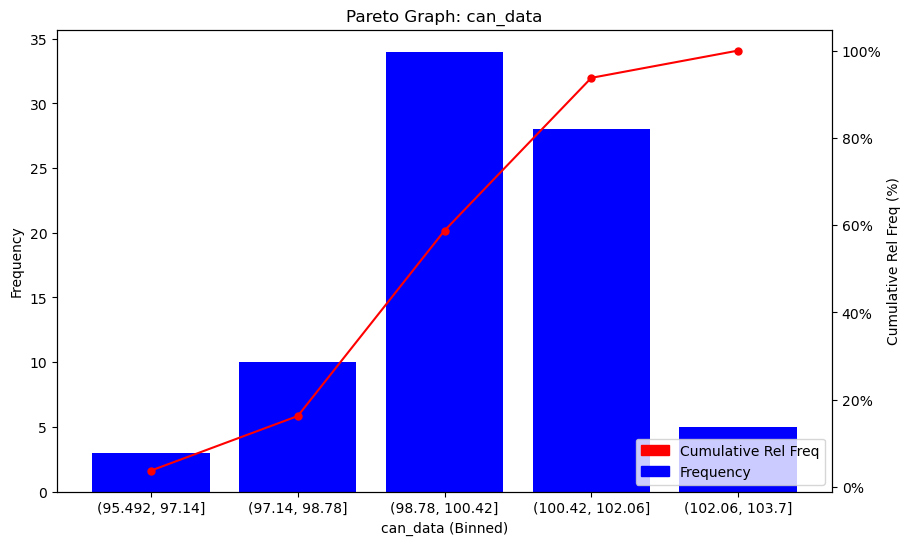

In [181]:
fix, ax = plt.subplots(figsize=(10, 6))
x_label = freq_table.index.astype(str)
ax.bar(x_label, freq_table['frequency'], color='b')
ax2 = ax.twinx()
ax2.plot(x_label, freq_table['cum_relative_frequency'], color='r', marker='o', ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter(1))

p_legend1 = mpatches.Patch(color='r', label='Cumulative Rel Freq')
p_legend2 = mpatches.Patch(color='b', label='Frequency')
plt.legend(handles=[p_legend1, p_legend2], loc="lower right")

# 제목과 축 레이블 설정
plt.title("Pareto Graph: can_data")
ax.set_xlabel("can_data (Binned)")
ax.set_ylabel("Frequency")
ax2.set_ylabel("Cumulative Rel Freq (%)")

plt.show()